# Homework 2: Perceptron, Logistic Regression, Stocashtic Gradient Descent



This assignment is due on Canvas by **11:59pm on Friday Feb 19**. 
Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.
Your solutions to computational questions should include any specified Python code and results 
as well as written commentary on your conclusions.
Remember that you are encouraged to discuss the problems with your instructors and classmates, 
but **you must write all code and solutions on your own**. For a refresher on the course **Collaboration Policy** click [here](https://github.com/akkikiki/CSCI-4622-Machine-Learning-sp21/blob/main/info/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda (Version: 2019.07) with Python 3.7. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- Extra credit questions will not make your homework total scores overflow i.e., not exceed 30% in the final grade. But you can use extra credit in one homework to cover another.

**Acknowledgment** : Chris Ketelsen, Chenhao Tan


**Please put your name and cuidentity username.**

**Name**: Kai Hueske-VanCeylon

**Identity Key**: kahu1945

In [1]:
import math
import pickle
import gzip
import numpy as np
import pandas
import matplotlib.pylab as plt
%matplotlib inline

## [40 points] Problem 1 - Perceptron Training

Consider a binary classification problem on the following dataset:

| x1   | x2         | x3      | y| 
|:------:|:------------:| :-----------:|---:|
|0|0|0|-1|
|0|0|1|1|
|0|1|0|1|
|1|0|0|1|
|0|1|1|-1|
|1|1|0|-1|
|1|0|1|-1|
|1|1|1|1|

We are going to experiment with the Perceptron algorithm in this problem.

### Part 1 [5 points]
Complete the `perceptron_train` function and report the results.

In [2]:
# Do not change - unless needed
data = np.array([
    [0, 0, 0, 1, 0, 1, 1, 1],
    [0, 0, 1, 0, 1, 1, 0, 1],
    [0, 1, 0, 0, 1, 0, 1, 1],
    [-1, 1, 1, 1, -1, -1, -1, 1]
])
data = np.transpose(data)
# Initialize the weights and bias (note that we use a non-standard initialization here).
weights = np.array([0, 0.5, 0.5])
bias = 1

In [3]:
def perceptron_train(data, weights, bias):
    """
    apply transformation and update weights and bias
    :type X: array
    :type y: int
    :type weights: array
    :type bias : int
    :rtype: weights, bias, number of mistakes
    """
    mistakes_count = 0
    for row in data:
        X = np.array(row[:3])
        y = row[-1]
        
        isNonNeg = np.dot(weights, X) + bias >= 0
        yHat = (1 if isNonNeg else -1)
        if yHat != y:
            mistakes_count += 1
            newWeights = weights + y * X
            weights = newWeights
            bias = bias + y
        
    return weights, bias, mistakes_count

#### Part 1 A [2.5 points]
Report the weights, bias, and number of mistakes after the first epoch.

In [82]:
### Do not change or remove this code
weights, bias, number_of_mistakes = perceptron_train(data, weights, bias)
print(f'weights: {weights}, bias: {bias}, mistakes: {number_of_mistakes}')

weights: [1.  0.5 0.5], bias: -1, mistakes: 4


In [83]:
# for grading - ignore

#### Part 1 B [2.5 points]:
Run the perceptron training for 50 more epochs with the updated weights and report the weights, bias and number of mistakes.

In [84]:
epochs = 50
for i in range(epochs):
    weights, bias, mistakes_count = perceptron_train(data, weights, bias)
#     print(f'Epoch {i}: {mistakes_count} mistakes')
    number_of_mistakes += mistakes_count
print(f'weights: {weights}, bias: {bias}, mistakes: {number_of_mistakes}')

weights: [1.  0.5 0.5], bias: -1, mistakes: 204


In [7]:
# for grading - ignore

### Part 2 [5 points] 
Is it possible that your Perceptron classifier would 
ever perfectly classify all training examples after more passes of the Perceptron Algorithm?
Clearly explain your reasoning.

It doesn't seem so. The weights seem to have converged, and the number of mistakes it makes each epoch seems to be the same. This indicates that the dataset may be linearly inseparable, which would mean no matter how many epochs the perceptron trains for, it won't converge to a solution that correctly classifies all the data, since the hyperplane it draws just mathematically *can't* separate the data perfectly.  
I'd like to note that I assumed `number_of_mistakes` meant the *total* number of mistakes over all 50 epochs, and so that will also continue to increase - it's not the `mistakes_count` returned by the training function.

### Part 3 [5 points] 
Does the Perceptron classifier necessarily make the same number of mistakes after the first epoch if the data is presented in any other randomized order? 
    Explain your reasoning.

It seems this way. Since the weights seem to have converged, this indicates that the perceptron algorithm can't improve the fit of the weights to the data at all, and since there are still 4 mistakes per epoch after the first one, the data is probably linearly inseparable because of those 4 points. This means that no matter what order it sees them in, the perceptron can't fit to them, and will always make those 4 mistakes.

###  Part 4 [15 Points]:  Perceptron Classifier on random generated data

Update the Perceptron Learning Algorithm to explore the convergence on linearly separable simulated data sets with particular properties. Take a look at the `Perceptron` class below.

In [8]:
class Perceptron:
    """
    Class to fit a perceptron classifier to simulated data
    """

    def __init__(self, n=100, margin=0.1, X=None, y=None, random_state=1241):
        """
        Initializes Perceptron class.  Generates training data and sets parameters. 

        :param n: the number of training examples
        :param margin: the margin between decision boundary and data
        :param random_state: seed for random number generator 
        :param X: (numpy array) Input training features.  Only used for unit testing. 
        :param y: (numpy array) Input training labels.  Only used for unit testing. 
        """
        # initalize random seed
        np.random.seed(random_state)

        # initialize parameters
        self.n, self.M = n, margin

        # generate random simulated data
        self.X_train, self.y_train = self.gen_data()
        
        # assert statements to verify the shape of self.X_train, self.y_train
        assert self.X_train.shape == (100,2)
        assert self.y_train.shape == (100,)

        # only used for unit tests
        if X is not None and y is not None:
            self.X_train, self.y_train, self.n = X, y, X.shape[0]

        # initialize weights and bias
        self.w = np.array([1.0, 0.0])
        self.b = 0

        # initialize total mistake counter
        self.num_mistakes = 0

    def train(self, max_epochs=100):
        """
        Runs the Perceptron Algorithm until all training data is correctly classified. 

        :param max_epochs: Maximum number of epochs to perform before stopping.
        """
        
        X, y = self.X_train, self.y_train
        weights, bias = self.w, self.b   
        
        for i in range(max_epochs):
            
            # generate random order for data points
            order = np.random.choice(range(len(X)), replace=False, size=len(X))
            mistakes_count = 0
            
            # training for this epoch
            for example in order:

                isNonNeg = np.dot(weights, X[example]) + bias >= 0
                yHat = (1 if isNonNeg else -1)
                if yHat != y[example]:
                    mistakes_count += 1
                    newWeights = weights + y[example] * X[example]
                    weights = newWeights
                    bias = bias + y[example]
                    
            self.num_mistakes += mistakes_count
            
            # convergence check
            if(mistakes_count == 0):
                # print(f'Convergence at {i}!')
                break
        
        self.w, self.b = weights, bias
        
    def plot_model(self, decision_boundary=False):
        """
        Plots the simulated data.  Plots the learned decision boundary (#TODO) 
        """
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
        colors = ["steelblue" if yi == -
                  1 else "#a76c6e" for yi in self.y_train]
        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], color=colors, s=75)
        if decision_boundary:
            xSpace = np.linspace(min(self.X_train[:, 0]), max(self.X_train[:, 0]), len(self.X_train))
            print(len(xSpace))
            boundary = (-1 * self.w[0] * xSpace - self.b) / self.w[1]
            ax.plot(xSpace, boundary)
            
        ax.grid(alpha=0.25)
        ax.set_xlabel(r"$x_1$", fontsize=16)
        ax.set_ylabel(r"$x_2$", fontsize=16)

    def gen_data(self):
        """
        Generate random linearly separable data with given margin. 
        Note: You should not need to change this function 
        """
        flip = np.random.choice([-1, 1])
        pos_x1 = np.random.uniform(-1 / np.sqrt(2), 1 / np.sqrt(2), int(self.n / 2))
        pos_x2 = np.random.uniform(
            self.M + flip * 0.1, 1 / np.sqrt(2), int(self.n / 2))
        pos_x2[-1] = self.M + flip * 0.1
        neg_x1 = np.random.uniform(-1 / np.sqrt(2), 1 / np.sqrt(2), int(self.n / 2))
        neg_x2 = np.random.uniform(-1 / np.sqrt(2), -
                                   self.M + flip * 0.1, int(self.n / 2))
        neg_x2[-1] = -self.M + flip * 0.1
        X = np.concatenate((np.column_stack((pos_x1, pos_x2)),
                            np.column_stack((neg_x1, neg_x2))))
        X = np.dot(X, np.array(
            [[np.cos(np.pi / 6), np.sin(np.pi / 6)], [-np.sin(np.pi / 6), np.cos(np.pi / 6)]]))
        y = np.array([+1] * int(self.n / 2) + [-1] * int(self.n / 2))
        rand_order = np.random.choice(
            range(self.n), replace=False, size=self.n)
        return X[rand_order], y[rand_order]

#### Part 4 A [5 points]
The `Perceptron` class above has the capability of generating its own training data with certain properties. Execute the cell below to generate $n=100$ simulated training examples and plot them. Experiment with the `margin` parameter (good values to try are between $0.01$ and $0.4$). Explain what the `margin` parameter is doing.

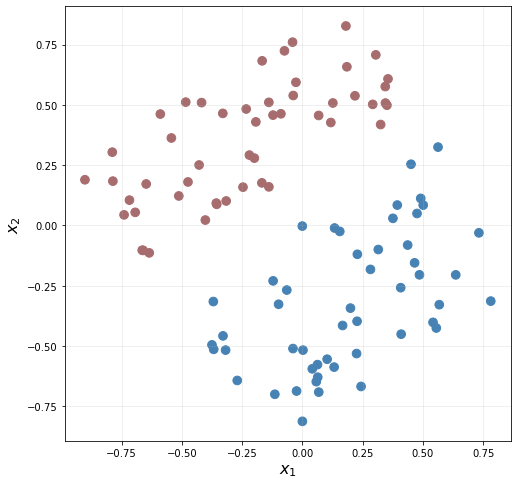

In [9]:
margin = 0.1 # subject to experiment
perc = Perceptron(n=100, margin=margin)
perc.plot_model(decision_boundary=False)

The `margin` parameter determines how far apart the data in each class are. A larger margin means a wider space free of datapoints around the decision boundary between the two classes.

#### Part 4 B [5 points] 
Modify the `train` method in the `Perceptron` class to perform the Perceptron Learning Algorithm and learn weights ${\bf w}$ and bias $b$ that perfectly classify the linearly separable training data. Your implementation should:

- Visit all training examples in a random shuffled order over each training epoch.
- Terminate when you finish an epoch without making a single classification error or when you hit the maximum number of epochs.
- Use the `self.num_mistakes` counter to count the total number of classification errors over the entire training process.


Notes:

You should not use Scikit-Learn's Perceptron object in your solution.
It's a good idea to implement a stopping criterion based on the `max_epochs` parameter as the first step. Later we'll look at training sets that will terminate on their own, but implementing a stopping mechanism will save you some pain in the development process.
Do not change the initial guess for the weights and bias. These values were chosen to match the example done in lecture for the unit tests.

In [10]:
from tests import tests
tests.run_test_suite('prob 1.4B', Perceptron)

TestNegMistake (tests.tests.TestPerceptron) ... ok
TestPosMistake (tests.tests.TestPerceptron) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.011s

OK


#### Part 4 C [5 points]
Modify the `plot_model` method so that it plots the learned decision boundary with the training data. Demonstrate that your method is working by training a perceptron with a margin of your choice and displaying the resulting plot. What is the equation of the learned decision boundary? (Use symbols not numbers.)


Since the decision boundary is at $\textbf{w} \bullet \textbf{x} + b = 0$, or in this case $w_1 x_1 + w_2 x_2 + b = 0$, and since for this plot $x_1 = x, x_2 = y$, we can rearrange this to the line $y = \frac{- w_1  x - b}{w_2}$

100


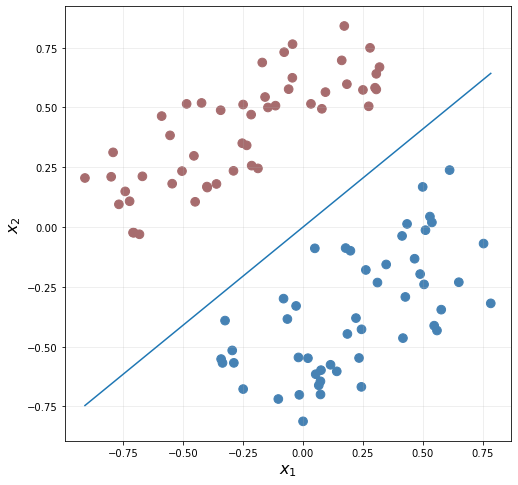

In [11]:
perc = Perceptron(n=100, margin=0.2)
perc.train()
perc.plot_model(decision_boundary=True)

### Part 5 [10 points]

Verify the theorem which states that, if you train a perceptron on linearly separable training data with margin $\gamma > 0$ and each training point satisfies $\|{\bf x}\|_2 \leq 1$ then the Perceptron algorithm will complete after making at most $1/\gamma^2$ classification mistakes.

Do the following to verify the above statement: 
- Train perceptrons with $n = 100$ and different margins ($\gamma=0.3, 0.1, 0.01, 0.001,$ and $0.0001$).
- Produce a log-log plot with $1/\gamma$ on the horizontal axis and the total numbers of mistakes on the vertical axis. 
- On the same set of axes, plot the theoretical upper bound on the number of training mistakes.

Usually we run multiple simulations and get an averaged total number of mistakes for each margin, but it is fine if you only do once.

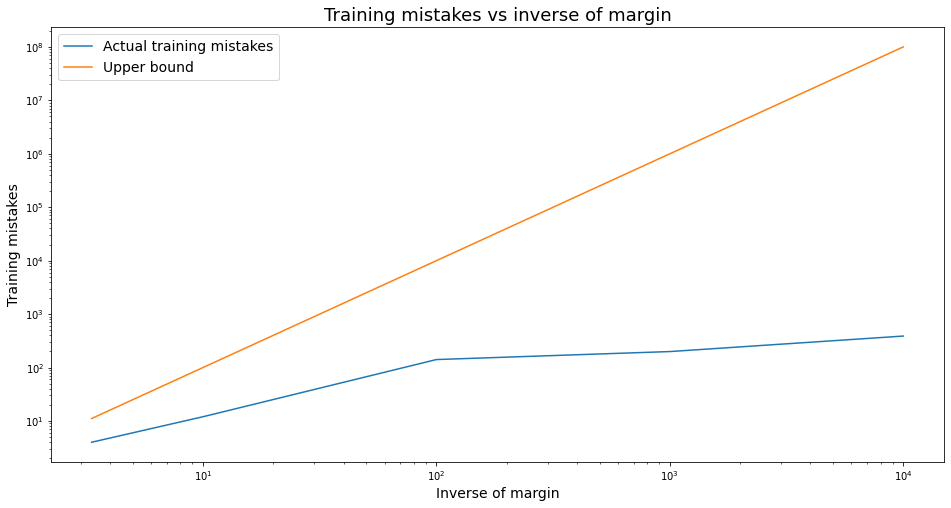

In [12]:
margins = np.array([0.3, 0.1, 0.01, 0.001, 0.0001])
mistakes = []
fig, ax = plt.subplots(figsize=(16, 8))

for margin in margins:
    # initialize and train perceptron
    newPerc = Perceptron(n=100, margin=margin)
    newPerc.train()
    mistakes.append(newPerc.num_mistakes)
    
# plot results on log-log scale
ax.loglog(1 / margins, mistakes)
ax.loglog(1 / margins, (1 / margins)**2)
ax.set_title("Training mistakes vs inverse of margin", fontsize=18)
ax.set_xlabel("Inverse of margin", fontsize=14)
ax.set_ylabel("Training mistakes", fontsize=14)
ax.legend(["Actual training mistakes", "Upper bound"], fontsize=14)
plt.show()

#### Extra Credit [5 points]

* Explain the limitations of the vanilla perceptron implemented above.
* Provide pseudo code/steps to implement Voting Perceptron or Average Perceptron (see the textbook) and discuss the pros and cons (Compare space complexity)

YOUR ANSWER HERE

## [60 points] Problem 2 : Logistic Regression + SGD

In this Problem, you'll implement a Logistic Regression classifier to predict whether person on the Titanic will survive or not.


Dataset has following attributes:

|Variable|Definition|Key|
|:----:|:----:|:---|
|survival|	Survival|	0 = No, 1 = Yes|
|pclass|	Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|Age |Age in years	||
|fare	|Passenger fare|	|
|sibsp	|# of siblings / spouses aboard the Titanic| |
|parch	|# of parents / children aboard the Titanic	||
|sex	| Sex|	one hot encoded male, female|
|embarked | Port of Embarkation | one hot encoded C = Cherbourg, Q = Queenstown, S = Southampton|



Following is a class to load the titanic dataset.

In [13]:
# Make sure you have installed pandas and numpy before you run.
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp, log
from collections import defaultdict

class Dataset:
    """
    Class to load dataset containing titanic survival features
    """

    def __init__(self, location, random_state=1241):
        # You shouldn't have to modify this class, but you can if you'd like
        # We use this class in the "train" function, 
        # inside the "train" function you can see the shapes of the train/test numpy arrays created here
        
        # Load the dataset
        np.random.seed(random_state)
        f = gzip.open(location, 'rb')
        self.train_x, self.train_y, self.test_x, self.test_y = pickle.load(f)
        # appending biases
        self.train_x = np.concatenate((np.ones((self.train_x.shape[0], 1)), self.train_x), axis=1)
        self.test_x = np.concatenate((np.ones((self.test_x.shape[0], 1)), self.test_x), axis=1)
        f.close()
        
    @staticmethod
    def shuffle(X, y):
        """ Shuffle training data """
        shuffled_indices = np.random.permutation(len(y))
        return X[shuffled_indices], y[shuffled_indices]

### Part 1 [5 points]: Implementing sigmoid

#### Part 1 A [4 points] 
First, implement the `sigmoid` function to return the output by applying the sigmoid function $\sigma(z)$ to the input parameter, where the sigmoid function $\sigma(z)$ is defined as:
$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

In [14]:
def sigmoid(score, threshold=20.0):
    """
    Sigmoid function with a threshold
    :param score: A real valued number to convert into a number between 0 and 1
    :param threshold : Prevent overflow of exp by capping activation at 20.
    return sigmoid function result.
    """
    threshold = (threshold if score > 0 else -1 * threshold)
    score = (score if abs(score) < abs(threshold) else threshold)
    return 1 / (1 + exp(-1 * score))

In [15]:
# verify sigmoid implemention w/ scipy;
# note: you should NOT use scipy for your implementation!
from scipy.stats import logistic
assert sigmoid(1) == logistic.cdf(1)
assert sigmoid(5) == logistic.cdf(5)
assert sigmoid(100, threshold=20) == logistic.cdf(20)
assert sigmoid(-1) == logistic.cdf(-1)
assert sigmoid(-5) == logistic.cdf(-5)
assert sigmoid(-100, threshold=20) == logistic.cdf(-20)

#### Part 1 B [1 point]

Next, implement the derivative of the `sigmoid` function, `sigmoid_grad`, i.e. $\frac{\partial\sigma(x)}{\partial x}$.

Hint: your implementation of `sigmoid_grad` should be able to use  your `sigmoid` function to compute the derivative!

In [16]:
def sigmoid_grad(y, threshold=20.0):
    """
    Derivative/gradient of the sigmoid function.
    :param y: A real valued input for which to compute the derivative.
    :param threshold : Prevent overflow of exp by capping activation at 20.
    return sigmoid derivative function result.
    """
    threshold = (threshold if y > 0 else -1 * threshold)
    y = (y if abs(y) < abs(threshold) else threshold)
    return exp(-1 * y) * (sigmoid(y, threshold)**2) # this is what I used at first

In [17]:
# verify sigmoid_grad using numerical differentiation, i.e: f(x+h)-f(x-h) / 2h
epsilon = 1.0E-8
assert np.isclose(sigmoid_grad(1.0), (sigmoid(1.0 + epsilon) - sigmoid(1.0 - epsilon)) / (2.0*epsilon))
assert np.isclose(sigmoid_grad(0.1), (sigmoid(0.1 + epsilon) - sigmoid(0.1 - epsilon)) / (2.0*epsilon))

### Part 2 [35 points]

#### Part 2 A [15 points]

The negative log likelihood objective is defined as:
$$
\textrm{NLL}(\boldsymbol{\beta}) = -\displaystyle\sum_{i=1}^n \left[y_i \log \sigma(\boldsymbol{\beta}^T{\bf x}^{(i)}) + (1-y_i)\log(1 - \sigma(\boldsymbol{\beta}^T{\bf x}^{(i)}))\right] 
$$

First, write down the derivative of the negative log likelihood objective function, with respect to $\boldsymbol{\beta}$. Since we are working with SGD, derive it for  $n=1$.

$$
\frac{\partial L}{\partial \boldsymbol{\beta}} = - (y - \sigma (\boldsymbol{\beta}^T \textbf{x})) \textbf{x}
$$

Next, using the `sigmoid` function implemented earlier, finish the `sgd_update` function so that it performs stochastic gradient descent on the single training example and updates the weight vector correspondingly without regularization.

In [41]:
import math
class LogReg:
    def __init__(self, num_features, eta):
        """
        Create a logistic regression classifier
        :param num_features: The number of features (including bias)
        :param eta: learning rate
        """
        self.w = np.zeros(num_features)
        self.eta = eta

    def progress(self, examples_x, examples_y):
        """
        Given a set of examples, compute the probability and accuracy
        :param examples: The dataset to score
        :return: A tuple of (log probability, accuracy)
        """

        logprob = 0.0
        num_right = 0
        for x_i, y in zip(examples_x, examples_y):
            p = sigmoid(self.w.dot(x_i))
            if y == 1:
                logprob += math.log(p)
            else:
                logprob += math.log(1.0 - p)

            # Get accuracy
            if abs(y - p) <= 0.5:
                num_right += 1

        return logprob, float(num_right) / float(len(examples_y))

    def sgd_update(self, x_i, y, lam = 0.0):
        """
        Compute a stochastic gradient update to improve the log likelihood.
        :param x_i: The features of the example to take the gradient with respect to
        :param y: The target output of the example to take the gradient with respect to
        :param lam : regularization term
        :return: Return the new value of the regression coefficients
        """
        newWeights = self.w
        act = sigmoid(np.dot(self.w, x_i))
        for j, weight in enumerate(self.w):
            if(j != 0):
                newWeights[j] = self.w[j] - self.eta * ((-1 * (y - act) * x_i[j]) + 2 * lam * self.w[j])
            else:
                newWeights[j] = self.w[j] - self.eta * (-1 * (y - act) * x_i[j])
        self.w = newWeights
        return self.w

In [42]:
from tests import tests
tests.run_test_suite('prob 2A', LogReg)

testPosUnregUpdate (tests.tests.TestLogReg)
test update based on positive example ... ok
testNegUnregUpdate (tests.tests.TestLogReg)
test update based on negative example ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.003s

OK


#### Part 2 B [15 points]
Complete the code below to loop over the training data and perform stochastic gradient descent for a pre-defined number of epochs. You do not need to use the parameters lam and decay for this part.

Note: remember to shuffle your training data using `Dataset.shuffle` at the beginning of each epoch.

In [70]:
def train(epochs, eta, store_epoch, lam=0, decay=0):
    """
    Train a LogReg object for a set number of epochs with a given eta.
    
    Return three lists
    Two lists keep track of training and test accuracy after every store_epoch epochs
    
    The third list keeps track of learning rate after every store_epoch epochs. All values in this list 
    will be the same if decay = 0 (Only required for Part 2F)
    
    With store_epoch = 100, you would store accuracies after epochs = 100, 200....
    
    :param epochs: total number of training epochs
    :param eta: learning rate
    :param store_epoch: store training and test accuracies every store_epoch epochs
    :param lam: weight given to regularization term. 
    :param decay: Used to update learning rate during training (Part 3). 
                  Equals 0 when learning rate is constant throughout training (Part 2). 
    """
    
    dataset_handler = Dataset('./data/titanic.pklz')
    lr = LogReg(dataset_handler.train_x.shape[1], eta)
    
    # assert statements to verify the shape of dataset_handler.train_x and dataset_handler.test_x
    assert dataset_handler.train_x.shape == (796,11)
    assert dataset_handler.test_x.shape == (200,11)
    
    train_accuracy_array = []
    test_accuracy_array = []
    learning_rates = []
    for epoch in range(epochs):
        
        lr.eta = eta / (1 + decay * epoch)
        X, y = Dataset.shuffle(dataset_handler.train_x, dataset_handler.train_y)
        for i in range(len(X)):
            lr.sgd_update(X[i], y[i], lam)
        
        if(epoch % store_epoch == 0):
            train_accuracy_array.append(lr.progress(X, y)[1])
            test_accuracy_array.append(lr.progress(dataset_handler.test_x, dataset_handler.test_y)[1])
            learning_rates.append(lr.eta)
        
    return train_accuracy_array, test_accuracy_array, learning_rates

In [71]:
eta  = 1e-3
epochs = 500
store_epoch = 100

train_acc, test_acc, _ = train(epochs, eta, store_epoch)

for i in range(len(train_acc)):
    print("train accuracy after {} epochs: {}".format((i+1)*store_epoch, train_acc[i]))
    print("test accuracy after {} epochs: {}".format((i+1)*store_epoch, test_acc[i]))
    

train accuracy after 100 epochs: 0.5
test accuracy after 100 epochs: 0.52
train accuracy after 200 epochs: 0.7525125628140703
test accuracy after 200 epochs: 0.715
train accuracy after 300 epochs: 0.7525125628140703
test accuracy after 300 epochs: 0.74
train accuracy after 400 epochs: 0.7550251256281407
test accuracy after 400 epochs: 0.755
train accuracy after 500 epochs: 0.757537688442211
test accuracy after 500 epochs: 0.725


#### Part 2 C [5 points]
What is the role of the learning rate? What are the pros and cons of high/low learning rates? Do you see any trade-off? First, plot accuracies of different $\eta$s together vs. number of epochs for both training and testing. Then briefly elaborate on these questions.

In [72]:
dataset_handler = Dataset('./data/titanic.pklz')
train_results = {}
test_results = {}

epochs = 1500
store_epoch = 50
for eta in [1e-3, 1e-4, 1e-5, 1e-6]:
    sgd_results = train(epochs, eta, store_epoch)
    train_results[eta] = sgd_results[0]
    test_results[eta] = sgd_results[1]

Plot training results below.

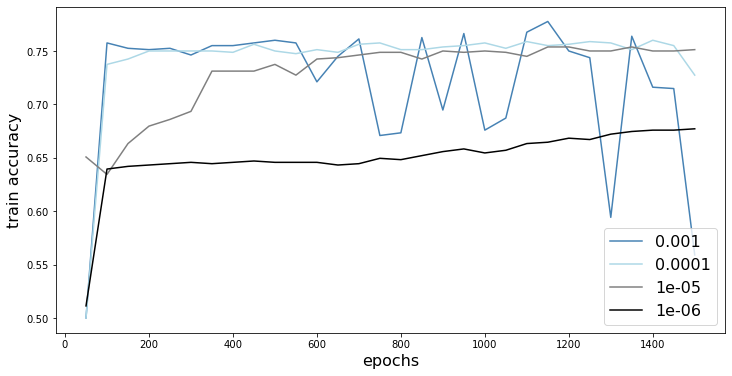

In [73]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
epochs_array = [i for i in range(store_epoch, epochs, store_epoch)]
epochs_array.append(epochs)
ax.plot(epochs_array, train_results[1e-3], color="steelblue", label=str(1e-3))
ax.plot(epochs_array, train_results[1e-4], color="lightblue", label=str(1e-4))
ax.plot(epochs_array, train_results[1e-5], color="grey", label=str(1e-5))
ax.plot(epochs_array, train_results[1e-6], color="black", label=str(1e-6))
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("train accuracy", fontsize=16)
plt.show()

Plot testing results below.

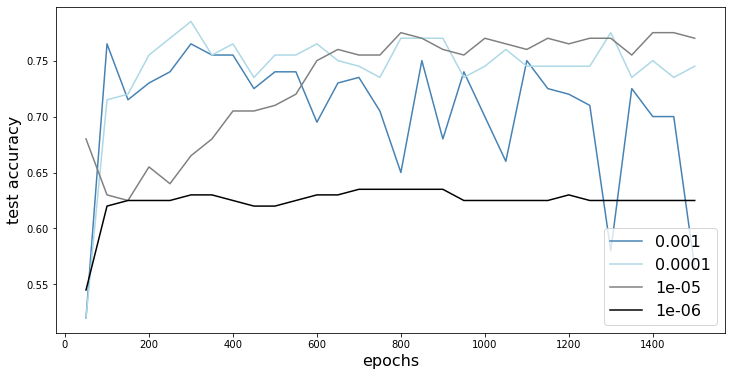

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
epochs_array = [i for i in range(store_epoch,epochs,store_epoch)]
epochs_array.append(epochs)
ax.plot(epochs_array, test_results[1e-3], color="steelblue", label=str(1e-3))
ax.plot(epochs_array, test_results[1e-4], color="lightblue", label=str(1e-4))
ax.plot(epochs_array, test_results[1e-5], color="grey", label=str(1e-5))
ax.plot(epochs_array, test_results[1e-6], color="black", label=str(1e-6))
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("test accuracy", fontsize=16)
plt.show()

The role of $\eta$ is to prevent overshooting the minimum that we're trying to find. From these tests, it seems like there's a particular range of $\eta$ that works best. Higher values ($\eta = 0.001, 0.0001$) seem to make the accuracy vary pretty wildly over the course of the training, for both the training and test datasets, although it did seem like overfitting was less of a problem (which could just be a result of the wild inconsistency). Very low values like $\eta = 10^{-6}$ seem to impede the learning process a lot, since they make the gradient vector much smaller which kept the increase in accuracy very slow. The model also seemed to overfit slightly in this case; accuracy on the training dataset increased steadily, but accuracy on the test dataset increased for a while and then begin to decrease again. For these data, $\eta = 10^{-5}$ seems to be ideal - its accuracy increased pretty steadily on both the training and test datasets.

#### Part 2 D [10 points]

Adding $l_2$ regularization to the feature parameters for NLL loss gives:

$$
\textrm{NLL}_{l_2}(\boldsymbol{\beta}) = -\displaystyle\sum_{i=1}^n \left[y_i \log \sigma(\boldsymbol{\beta}^T{\bf x}^{(i)}) + (1-y_i)\log(1 - \sigma(\boldsymbol{\beta}^T{\bf x}^{(i)}))\right] + \lambda\displaystyle\sum_{k=1}^{p} \beta_{k}^2
$$

where $p$ is the number of features, and $\beta_0$ is the bias term. Notice that $\beta_0$ is not included in the regularization term.

Write down the derivative of the regularized negative log likelihood loss function $\textrm{NLL}_{l_2}$ with respect to $\boldsymbol{\beta}$. Since we are working with SGD, derive it for $n=1$.

$$
\frac{\partial}{\partial \boldsymbol{\beta}} \textrm{NLL}_{l_2}(\boldsymbol{\beta}) =
- (y - \sigma (\boldsymbol{\beta}^T \textbf{x})) \textbf{x} +
\frac{\partial}{\partial \boldsymbol{\beta}} \lambda\displaystyle\sum_{k=1}^{p} \beta_{k}^2 \\
= - (y - \sigma (\boldsymbol{\beta}^T \textbf{x})) \textbf{x} + 2 \lambda \boldsymbol{\beta}
$$

Update your implementation of the `sgd_update` method so that it performs regularized SGD updates of the model parameters to minimize the regularized NLL loss function.

Remember, do **not** regularize the bias parameter $\beta_0$.

Provide train and test accuracy after above change with `lam=1e-5`.

In [75]:
from tests import tests
tests.run_test_suite('prob 2E', LogReg)

testNegRegUpdate (tests.tests.TestLogReg)
test update based on negative example ... ok
testPosRegUpdate (tests.tests.TestLogReg)
test regularized update based on positive example ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.004s

OK


#### Part 2 E [5 points]
Update your implementation of train() to incorporate a regularization term. The change should typically be on only one line in your code.

Plot accuracies of different $\lambda$s together vs. epochs for both training and testing).

In [76]:
dataset_handler = Dataset('./data/titanic.pklz')
train_results = {}
test_results = {}
epochs = 1500
eta = 1e-5
store_epoch = 50
for lam in [0, 0.01, 0.1, 0.05]:
    sgd_results = train(epochs, eta, store_epoch, lam=lam)
    train_results[lam] = sgd_results[0]
    test_results[lam] = sgd_results[1]

Plot training results below.

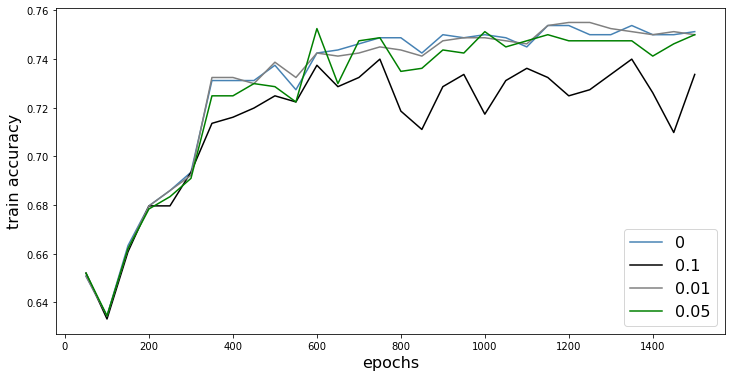

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
epochs_array = [i for i in range(store_epoch,epochs,store_epoch)]
epochs_array.append(epochs)
ax.plot(epochs_array, train_results[0], color="steelblue", label=str(0))
ax.plot(epochs_array, train_results[1e-1], color="black", label=str(1e-1))
ax.plot(epochs_array, train_results[1e-2], color="grey", label=str(1e-2))
ax.plot(epochs_array, train_results[5e-2], color="green", label=str(5e-2))
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("train accuracy", fontsize=16)
plt.show()

Plot testing results below.

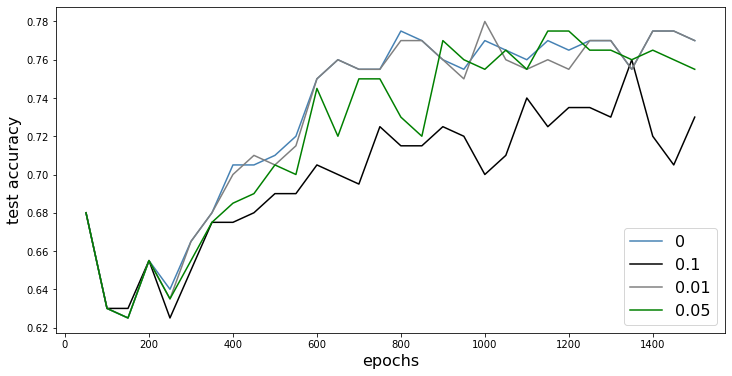

In [78]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
epochs_array = [i for i in range(store_epoch,epochs,store_epoch)]
epochs_array.append(epochs)
ax.plot(epochs_array, test_results[0], color="steelblue", label=str(0))
ax.plot(epochs_array, test_results[1e-1], color="black", label=str(1e-1))
ax.plot(epochs_array, test_results[1e-2], color="grey", label=str(1e-2))
ax.plot(epochs_array, test_results[5e-2], color="green", label=str(5e-2))
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("test accuracy", fontsize=16)
plt.show()

**Part 2 F (continued)** What is the effect of regularization term with respect to accuracy? 

Adding a regularization term doesn't do too much to the training data, but seems to increase accuracy more notably on the test data - these graphs seemed slightly better than the previous ones for different values of $\eta$. There does seem to be a sweet spot around $\lambda = 0.01$ - as it increased past there, accuracy tended to decrease.

### Part 3 [5 points] 

Time based Learning Rate is dynamic learning rate given the following equation:

$\textrm{LearningRate} = \eta\, / \,(1 + \textrm{decay} \cdot \textrm{current epoch})$

Train SGD with the dynamic learning rate defined above and follow these instructions:
* Use initial learning rate $\eta = 0.1$.
* Use $\textrm{decay} = 0.001$.
* Update learning rate `lr.eta` every epoch.
* Plot train accuracy and learning rate together for each epoch.

The above can be accomplished by changing one line in `train()` from Part 2a. 

In [79]:
eta  = 1e-1
epochs = 200
store_epoch = 1

train_accuracy_array, test_accuracy_array, learning_rates = train(epochs, eta, 
                                                                  store_epoch, decay=0.001)

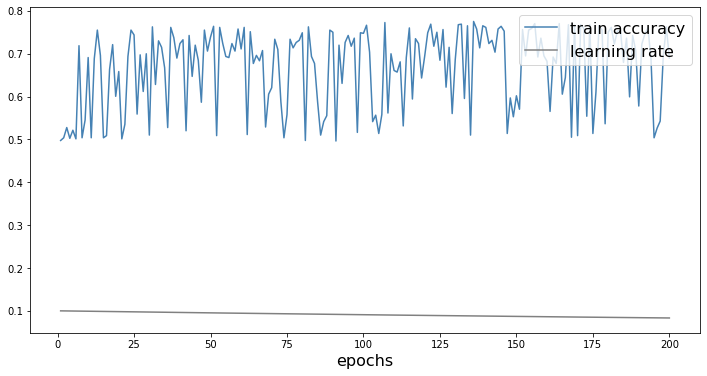

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
epochs_array = [i for i in range(1,epochs)]
epochs_array.append(epochs)
ax.plot(epochs_array, train_accuracy_array, color="steelblue", label=str('train accuracy'))
ax.plot(epochs_array, learning_rates,color="grey", label=str('learning rate'))
ax.legend(loc="upper right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("", fontsize=16)
plt.show()